In [11]:
from catboost import CatBoostRegressor

from utils.load import load_data, load_submission
from utils.feature import (
    add_hours,
    add_hours_trig_cyclic,
    apply_feature_engineering,
    get_dummies,
    fill_na_zero,
    drop_non_input_cols,
    normalize,
    standardize
)
from utils.model import ModelEvalWrapper

In [28]:
train_df, predict_df = load_data('../data')

In [10]:
_train_df, _predict_df = apply_feature_engineering(
    train_df,
    predict_df,
    funcs=[
        add_hours,
        fill_na_zero("all"),
        normalize(["txpower_cell0", "txpower_cell1", "txpower_cell2", "txpower_cell3"]),
        standardize(
            [
                "bandwidth_cell0",
                "antennas_cell0",
                "bandwidth_cell1",
                "antennas_cell1",
                "bandwidth_cell2",
                "antennas_cell2",
                "bandwidth_cell3",
                "antennas_cell3",
            ]
        ),
        get_dummies(
            [
                "hour",
                "rutype",
                "mode",
                "frequency_cell0",
                "frequency_cell1",
                "frequency_cell2",
                "frequency_cell3",
            ]
        ),
        drop_non_input_cols,
    ],
)

In [12]:
params = {
    'iterations': 10000,
    'learning_rate': 0.001,
    'depth': 6,
    'loss_function': 'MAE',
    'verbose': 100,
}

model_getter = lambda: CatBoostRegressor(**params)
model_trainer = lambda model, X, y: model.fit(X, y)
model_predictor = lambda model, X: model.predict(X)
model_eval = ModelEvalWrapper(
    model_getter,
    name="Basic Linear Regression",
    model_trainer=model_trainer,
    model_predictor=model_predictor,
)

model_eval.train_and_eval(_train_df)


INFO:root:Fold 1/5


0:	learn: 10.6353319	total: 54.5ms	remaining: 9m 5s
100:	learn: 9.8124084	total: 713ms	remaining: 1m 9s
200:	learn: 9.0766538	total: 1.38s	remaining: 1m 7s
300:	learn: 8.4195399	total: 2.04s	remaining: 1m 5s
400:	learn: 7.8329583	total: 2.7s	remaining: 1m 4s
500:	learn: 7.3085988	total: 3.38s	remaining: 1m 4s
600:	learn: 6.8434689	total: 4.04s	remaining: 1m 3s
700:	learn: 6.4288154	total: 4.69s	remaining: 1m 2s
800:	learn: 6.0561328	total: 5.35s	remaining: 1m 1s
900:	learn: 5.7218313	total: 6.01s	remaining: 1m
1000:	learn: 5.4223052	total: 6.68s	remaining: 1m
1100:	learn: 5.1555095	total: 7.35s	remaining: 59.4s
1200:	learn: 4.9165031	total: 8.02s	remaining: 58.7s
1300:	learn: 4.7044524	total: 8.71s	remaining: 58.2s
1400:	learn: 4.5187881	total: 9.39s	remaining: 57.6s
1500:	learn: 4.3542427	total: 10.1s	remaining: 57s
1600:	learn: 4.2082585	total: 10.7s	remaining: 56.2s
1700:	learn: 4.0792794	total: 11.4s	remaining: 55.5s
1800:	learn: 3.9662529	total: 12s	remaining: 54.7s
1900:	learn: 3

INFO:root:Train MAE: 2.6160, MAPE: 0.0948, MSE: 15.2652
INFO:root:Test MAE: 2.6480, MAPE: 0.0964, MSE: 15.6549
INFO:root:Fold 2/5


0:	learn: 10.5911774	total: 7.61ms	remaining: 1m 16s
100:	learn: 9.7748996	total: 666ms	remaining: 1m 5s
200:	learn: 9.0455922	total: 1.35s	remaining: 1m 5s
300:	learn: 8.3922377	total: 2.01s	remaining: 1m 4s
400:	learn: 7.8095844	total: 2.69s	remaining: 1m 4s
500:	learn: 7.2907667	total: 3.4s	remaining: 1m 4s
600:	learn: 6.8294167	total: 4.1s	remaining: 1m 4s
700:	learn: 6.4169894	total: 4.77s	remaining: 1m 3s
800:	learn: 6.0472523	total: 5.43s	remaining: 1m 2s
900:	learn: 5.7154384	total: 6.09s	remaining: 1m 1s
1000:	learn: 5.4195981	total: 6.77s	remaining: 1m
1100:	learn: 5.1518415	total: 7.46s	remaining: 1m
1200:	learn: 4.9160233	total: 8.12s	remaining: 59.5s
1300:	learn: 4.7055793	total: 8.82s	remaining: 58.9s
1400:	learn: 4.5204270	total: 9.49s	remaining: 58.2s
1500:	learn: 4.3560534	total: 10.2s	remaining: 57.5s
1600:	learn: 4.2109767	total: 10.8s	remaining: 56.7s
1700:	learn: 4.0827401	total: 11.5s	remaining: 56s
1800:	learn: 3.9708195	total: 12.1s	remaining: 55.3s
1900:	learn:

INFO:root:Train MAE: 2.6241, MAPE: 0.0952, MSE: 15.3419
INFO:root:Test MAE: 2.6113, MAPE: 0.0936, MSE: 15.2813
INFO:root:Fold 3/5


0:	learn: 10.6111161	total: 7.01ms	remaining: 1m 10s
100:	learn: 9.7921217	total: 667ms	remaining: 1m 5s
200:	learn: 9.0595905	total: 1.33s	remaining: 1m 5s
300:	learn: 8.4061336	total: 2s	remaining: 1m 4s
400:	learn: 7.8205448	total: 2.67s	remaining: 1m 3s
500:	learn: 7.2992424	total: 3.37s	remaining: 1m 3s
600:	learn: 6.8372667	total: 4.05s	remaining: 1m 3s
700:	learn: 6.4245874	total: 4.72s	remaining: 1m 2s
800:	learn: 6.0527783	total: 5.38s	remaining: 1m 1s
900:	learn: 5.7200132	total: 6.03s	remaining: 1m
1000:	learn: 5.4223618	total: 6.72s	remaining: 1m
1100:	learn: 5.1556949	total: 7.39s	remaining: 59.7s
1200:	learn: 4.9173914	total: 8.05s	remaining: 59s
1300:	learn: 4.7074878	total: 8.72s	remaining: 58.3s
1400:	learn: 4.5209089	total: 9.38s	remaining: 57.5s
1500:	learn: 4.3562313	total: 10s	remaining: 56.8s
1600:	learn: 4.2110245	total: 10.7s	remaining: 56.1s
1700:	learn: 4.0826630	total: 11.4s	remaining: 55.4s
1800:	learn: 3.9702696	total: 12s	remaining: 54.7s
1900:	learn: 3.87

INFO:root:Train MAE: 2.6195, MAPE: 0.0949, MSE: 15.3243
INFO:root:Test MAE: 2.6433, MAPE: 0.0965, MSE: 15.5776
INFO:root:Fold 4/5


0:	learn: 10.6067355	total: 7.14ms	remaining: 1m 11s
100:	learn: 9.7901475	total: 700ms	remaining: 1m 8s
200:	learn: 9.0595309	total: 1.38s	remaining: 1m 7s
300:	learn: 8.4062346	total: 2.08s	remaining: 1m 7s
400:	learn: 7.8216951	total: 2.75s	remaining: 1m 5s
500:	learn: 7.3005182	total: 3.43s	remaining: 1m 5s
600:	learn: 6.8370804	total: 4.1s	remaining: 1m 4s
700:	learn: 6.4221353	total: 4.78s	remaining: 1m 3s
800:	learn: 6.0517614	total: 5.44s	remaining: 1m 2s
900:	learn: 5.7203627	total: 6.12s	remaining: 1m 1s
1000:	learn: 5.4240093	total: 6.79s	remaining: 1m 1s
1100:	learn: 5.1580860	total: 7.46s	remaining: 1m
1200:	learn: 4.9212475	total: 8.14s	remaining: 59.7s
1300:	learn: 4.7116564	total: 8.85s	remaining: 59.2s
1400:	learn: 4.5274743	total: 9.54s	remaining: 58.5s
1500:	learn: 4.3636530	total: 10.2s	remaining: 57.8s
1600:	learn: 4.2179892	total: 10.9s	remaining: 56.9s
1700:	learn: 4.0890842	total: 11.6s	remaining: 56.4s
1800:	learn: 3.9758995	total: 12.3s	remaining: 55.8s
1900:	

INFO:root:Train MAE: 2.6229, MAPE: 0.0949, MSE: 15.4037
INFO:root:Test MAE: 2.6130, MAPE: 0.0950, MSE: 15.1825
INFO:root:Fold 5/5


0:	learn: 10.6001177	total: 6.96ms	remaining: 1m 9s
100:	learn: 9.7842898	total: 654ms	remaining: 1m 4s
200:	learn: 9.0528765	total: 1.3s	remaining: 1m 3s
300:	learn: 8.3970847	total: 1.96s	remaining: 1m 3s
400:	learn: 7.8150493	total: 2.62s	remaining: 1m 2s
500:	learn: 7.2954416	total: 3.28s	remaining: 1m 2s
600:	learn: 6.8341723	total: 3.94s	remaining: 1m 1s
700:	learn: 6.4209996	total: 4.6s	remaining: 1m
800:	learn: 6.0516624	total: 5.26s	remaining: 1m
900:	learn: 5.7183328	total: 5.93s	remaining: 59.9s
1000:	learn: 5.4199193	total: 6.6s	remaining: 59.3s
1100:	learn: 5.1524555	total: 7.26s	remaining: 58.7s
1200:	learn: 4.9164954	total: 7.93s	remaining: 58.1s
1300:	learn: 4.7051113	total: 8.59s	remaining: 57.4s
1400:	learn: 4.5200232	total: 9.26s	remaining: 56.8s
1500:	learn: 4.3575288	total: 9.92s	remaining: 56.2s
1600:	learn: 4.2119789	total: 10.6s	remaining: 55.6s
1700:	learn: 4.0828067	total: 11.3s	remaining: 55s
1800:	learn: 3.9692657	total: 11.9s	remaining: 54.3s
1900:	learn: 3

INFO:root:Train MAE: 2.6207, MAPE: 0.0951, MSE: 15.3406
INFO:root:Test MAE: 2.6302, MAPE: 0.0953, MSE: 15.3185
INFO:root:
Best model from fold 2
INFO:root:Best model mae: 2.6113, mape: 0.0936 mse: 15.2813

INFO:root:Average mae: 2.6291, mape: 0.0954, mse: 15.4030
INFO:root:Std mae: 0.0151, mape: 0.0010, mse: 0.1814


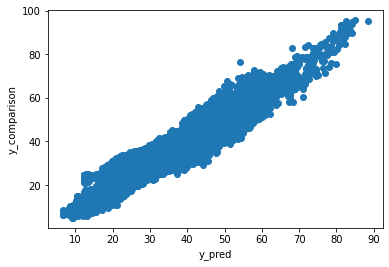

In [13]:
best_submission = load_submission("bestsubmission.csv")
model_eval.compare_predictions_with(_predict_df, best_submission['Energy'])

In [33]:
# filter train_df to only include rows where load_cell0 is greater than 0 and 1 to 3 are 0
_train_df[(_train_df['load_cell0'] > 0) & (_train_df['load_cell1'] > 0) & (_train_df['load_cell2'] > 0) & (_train_df['load_cell3'] > 0)].shape

(40, 99)